# Imports

In [2]:
# Third party libraries
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Internal code
import significance_testing

# Create example data

In [3]:
num_respondents = 10000
num_respondents_single_group = int(num_respondents / 2)

### No difference expected between the two groups

In [4]:
df_NO_DIFFERENCE = pd.DataFrame(
    {
        'respondent': range(num_respondents),
        'group_id': (['Group 1'] * num_respondents_single_group) + (['Group 2'] * num_respondents_single_group),
        'nps': np.random.randint(low=0, high=11, size=num_respondents)
    }
)

df_NO_DIFFERENCE.head()

,respondent,group_id,nps
0,0,Group 1,7
1,1,Group 1,8
2,2,Group 1,3
3,3,Group 1,9
4,4,Group 1,1


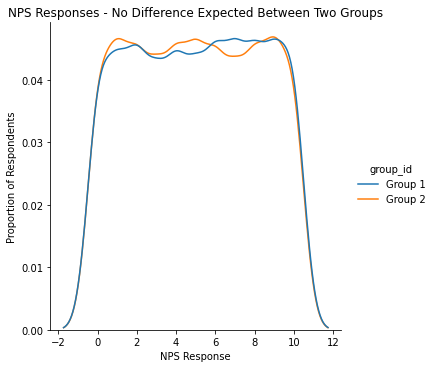

In [5]:
comparison_plot = sns.displot(df_NO_DIFFERENCE, x='nps', hue='group_id', kind='kde')

comparison_plot.set(
    xlabel='NPS Response',
    ylabel='Proportion of Respondents',
    title='NPS Responses - No Difference Expected Between Two Groups'
)

plt.show()

### Difference expected between the two groups

In [6]:
# First group randomly fall between 0 and 10 in their NPS responses
nps_scores_1 = np.random.randint(low=0, high=11, size=num_respondents_single_group)

# Second group randomly fall between 1 and 10 in their NPS responses
nps_scores_2 = np.random.randint(low=2, high=11, size=num_respondents_single_group)

df_DIFFERENCE = pd.DataFrame(
    {
        'respondent': range(num_respondents),
        'group_id': (['Group 1'] * num_respondents_single_group) + (['Group 2'] * num_respondents_single_group),
        'nps': np.concatenate((nps_scores_1, nps_scores_2))
    }
)

df_DIFFERENCE.head()

,respondent,group_id,nps
0,0,Group 1,7
1,1,Group 1,5
2,2,Group 1,1
3,3,Group 1,7
4,4,Group 1,9


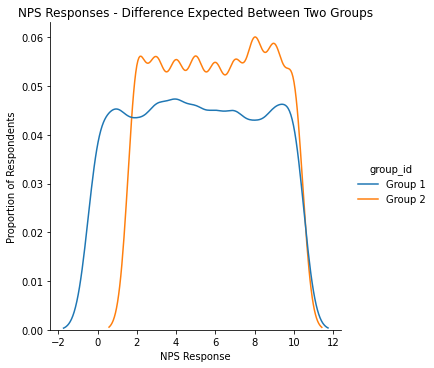

In [7]:
comparison_plot = sns.displot(df_DIFFERENCE, x='nps', hue='group_id', kind='kde')

comparison_plot.set(
    xlabel='NPS Response',
    ylabel='Proportion of Respondents',
    title='NPS Responses - Difference Expected Between Two Groups'
)

plt.show()

# Perform significance test on group where no difference is expected

#### Initialise tester

In [8]:
sig_tester = significance_testing.SigTester(
    data=df_NO_DIFFERENCE,
    group_id_column='group_id',
    nps_column='nps'
)

#### Repeat random permutations and capture the difference in NPS each time, making use of parallel processing

In [9]:
sig_tester.repeatedly_simulate_difference_in_nps(
    num_simulations=100000,
    num_parallel_processes=4
)

Running 100,000 simulations
Simulations complete


#### Run significance test and visualise outcome

In [10]:
sig_tester.summarise_sig_test(significance_level = 0.05)

NPS for the observed data:
	Group 1: -43.94
	Group 2: -45.36
	Absolute difference: 1.42

Out of 100,000 simulations, 37,000 displayed a greater absolute difference than what was observed.

With a p-value of 0.37 and significance level of 0.05, the observed difference IS NOT significant


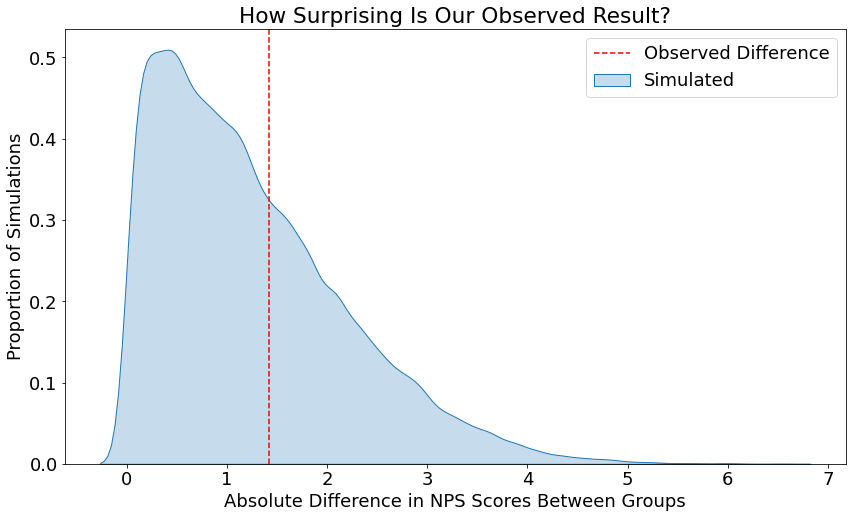

In [11]:
sig_tester.visualise_stat_test()

# Perform significance test on group where difference is expected

#### Initialise tester

In [12]:
sig_tester = significance_testing.SigTester(
    data=df_DIFFERENCE,
    group_id_column='group_id',
    nps_column='nps'
)

#### Repeat random permutations and capture the difference in NPS each time, making use of parallel processing

In [13]:
sig_tester.repeatedly_simulate_difference_in_nps(
    num_simulations=100000,
    num_parallel_processes=4
)

Running 100,000 simulations
Simulations complete


#### Run significance test and visualise outcome

In [14]:
sig_tester.summarise_sig_test(significance_level = 0.05)

NPS for the observed data:
	Group 1: -44.48
	Group 2: -32.76
	Absolute difference: 11.72

Out of 100,000 simulations, 0 displayed a greater absolute difference than what was observed.

With a p-value of 0.0 and significance level of 0.05, the observed difference IS significant


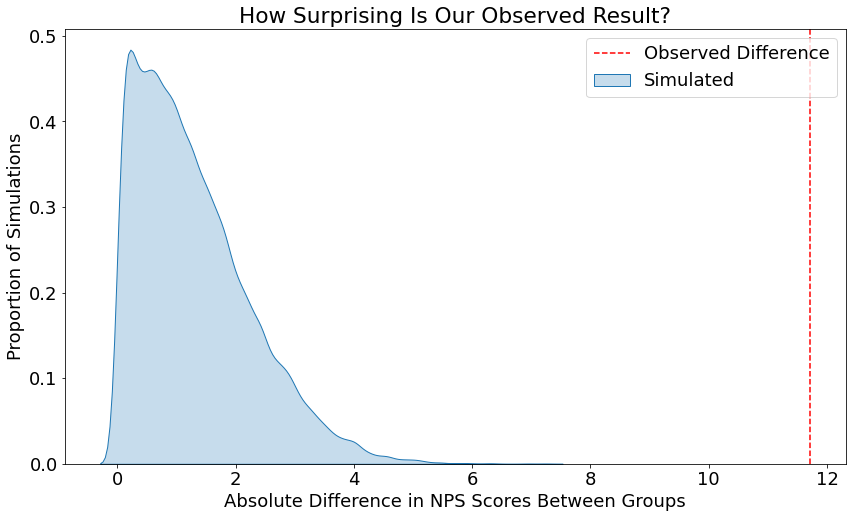

In [15]:
sig_tester.visualise_stat_test()
